<a href="https://colab.research.google.com/github/rawanamrrr/DeepLearning1/blob/main/Digit_Recognizer_VGG16_Fine_Tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
data = pd.read_csv("/content/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X = (data.drop(columns=['label'],axis=1).values / 255.0).reshape(-1,28,28)
y = data['label']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train.shape , X_test.shape

((2061, 28, 28), (229, 28, 28))

In [12]:
X_train=tf.image.grayscale_to_rgb(tf.expand_dims(X_train, axis=3))
X_test=tf.image.grayscale_to_rgb(tf.expand_dims(X_test, axis=3))

X_train=tf.image.resize_with_pad(X_train,32,32)
X_test=tf.image.resize_with_pad(X_test,32,32)


In [13]:
vggmodel = VGG16(input_shape=(32,32,3),weights='imagenet', include_top=False)
for layer in vggmodel.layers[:11]:
    layer.trainable = False
for i, layer in enumerate(vggmodel.layers):
    print(i, layer.name, layer.trainable)

top_model = vggmodel.output
top_model = Layers.Flatten()(top_model)
top_model = Layers.Dense(512, activation='relu')(top_model)
top_model = Layers.Dropout(0.5)(top_model)
top_model = Layers.Dense(64, activation='relu')(top_model)
top_model = Layers.Dropout(0.2)(top_model)

output_layer = Layers.Dense(10, activation='softmax')(top_model)
vggmodel = Models.Model(inputs=vggmodel.input, outputs=output_layer)
vggmodel.compile(optimizer=Optimizer.Adam(0.00001),loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])
vggmodel.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,010,826 (57.26 MB)

 Trainable params: 13,275,338 (50.64 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5,verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
trained = vggmodel.fit(X_train,y_train,validation_split=0.3,epochs=10,callbacks=[reduce_lr,es],batch_size=128)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 78s 7s/step - accuracy: 0.1218 - loss: 2.3717 - val_accuracy: 0.2908 - val_loss: 2.1276 - learning_rate: 1.0000e-05
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - accuracy: 0.1958 - loss: 2.2171 - val_accuracy: 0.5525 - val_loss: 1.9345 - learning_rate: 1.0000e-05
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.3296 - loss: 1.9926 - val_accuracy: 0.6704 - val_loss: 1.6993 - learning_rate: 1.0000e-05
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.4286 - loss: 1.8052 - val_accuracy: 0.7577 - val_loss: 1.4061 - learning_rate: 1.0000e-05
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.5105 - loss: 1.5729 - val_accuracy: 0.8223 - val_loss: 1.0994 - learning_rate: 1.0000e-05
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 134s 6s/step - accuracy: 0.6202 - loss: 1.3015 - val_accuracy: 0.8611 - val_loss: 0.7975 - learning_rate: 1.0000e-05
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.6739 - loss

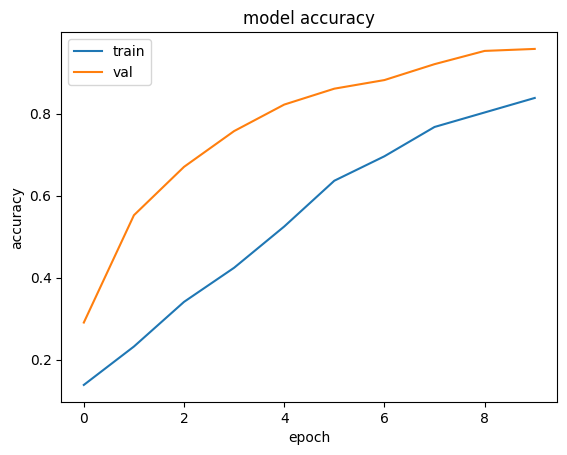

In [16]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

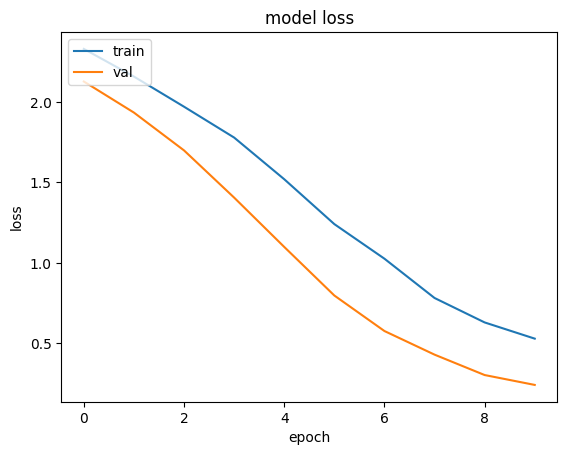

In [17]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
ModelLoss, ModelAccuracy = vggmodel.evaluate(X_test, y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.9581 - loss: nan
Test Loss is nan
Test Accuracy is 0.9475982785224915


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step
              precision    recall  f1-score   support

    Number 0       0.88      1.00      0.94        23
    Number 1       1.00      0.94      0.97        32
    Number 2       0.88      1.00      0.93        21
    Number 3       0.95      0.95      0.95        22
    Number 4       0.95      1.00      0.97        18
    Number 5       1.00      0.89      0.94        27
    Number 6       0.88      1.00      0.93        21
    Number 7       1.00      0.93      0.96        14
    Number 8       0.96      0.96      0.96        24
    Number 9       1.00      0.85      0.92        27

    accuracy                           0.95       229
   macro avg       0.95      0.95      0.95       229
weighted avg       0.95      0.95      0.95       229



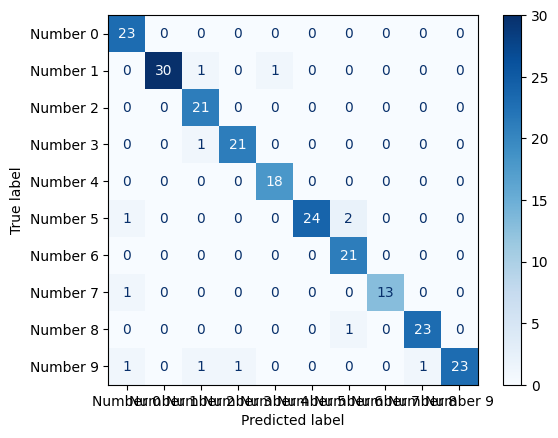

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = np.argmax(vggmodel.predict(X_test),axis=1)
classes = ["Number " + str(i) for i in range(10)]
print(classification_report(y_test, y_pred, target_names = classes)) #corrected the order of y_true,y_pred
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

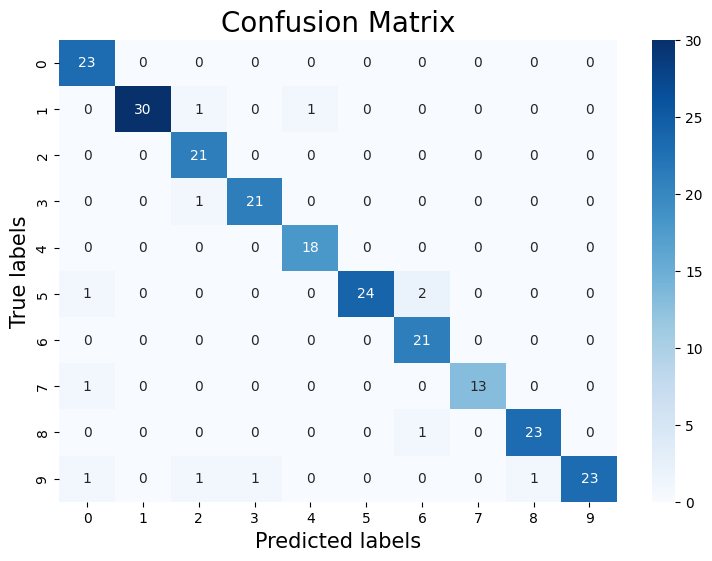

In [21]:
confusion_mtx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 6))
ax= plt.subplot()
sns.heatmap(confusion_mtx, annot=True,cmap=plt.cm.Blues, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels',size=15);
ax.set_ylabel('True labels',size=15);
ax.set_title('Confusion Matrix',size=20);

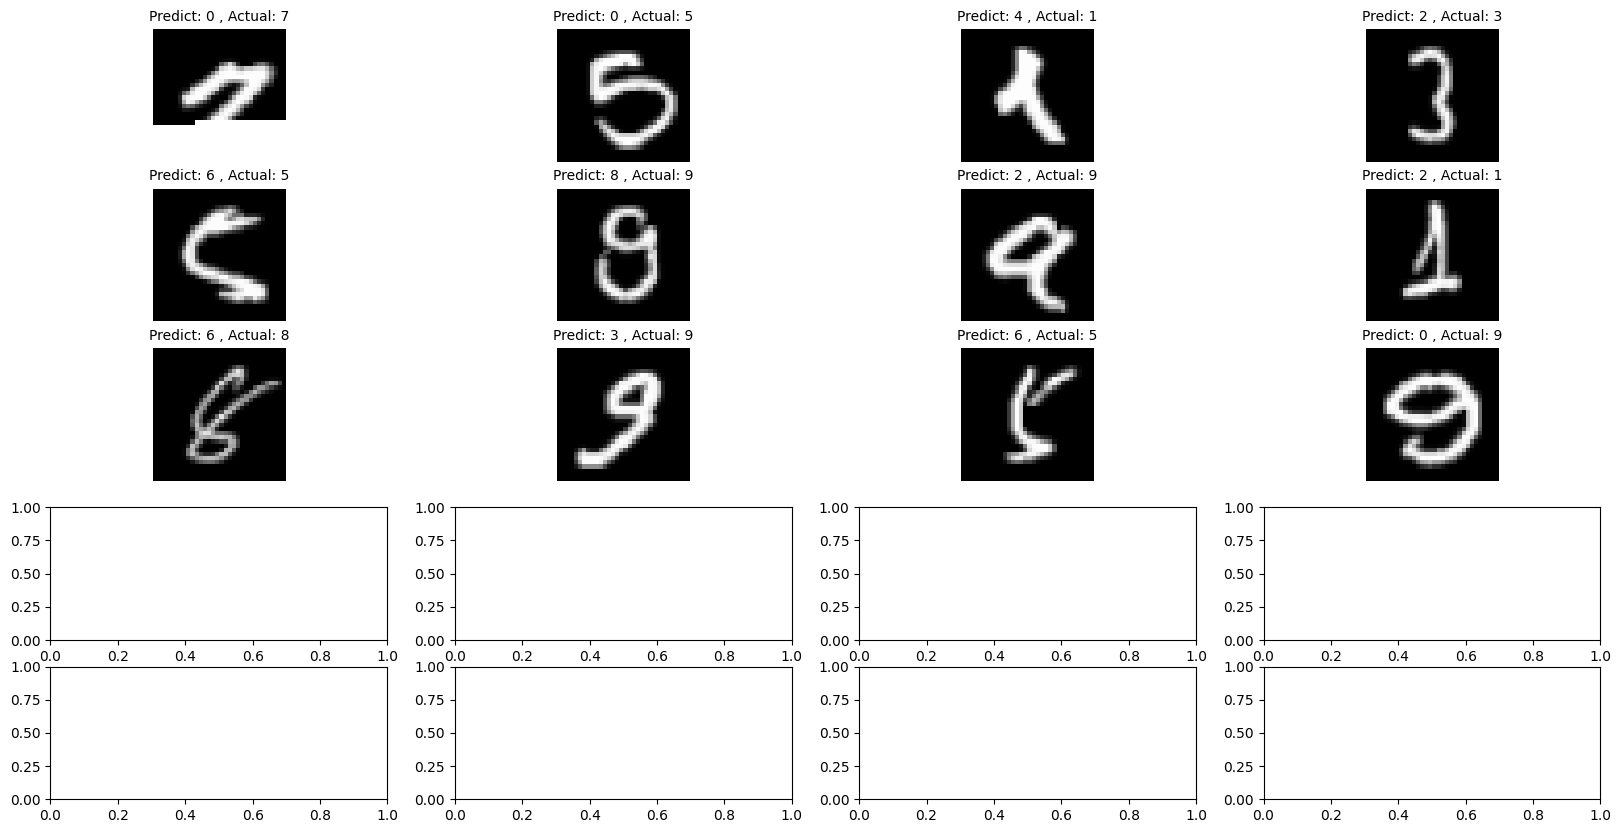

In [22]:
misclassifiedIndexes = np.where(y_pred !=y_test)[0]

fig, ax = plt.subplots(5, 4,figsize=(20,10));
ax = ax.ravel();
for i, badIndex in enumerate(misclassifiedIndexes[:20]):
    ax[i].imshow(X_test[badIndex])
    ax[i].set_title(f'Predict: {y_pred[badIndex]} , Actual: {np.array(y_test)[badIndex]}', fontsize = 10)
    ax[i].set(frame_on=False)
    ax[i].axis('off')

In [27]:
Test_data = (pd.read_csv('/content/test.csv').values / 255.0).reshape(-1,28,28)
Test_data=tf.image.grayscale_to_rgb(tf.expand_dims(Test_data, axis=3))
#resize to minimum size of (32x32)
Test_data=tf.image.resize_with_pad(Test_data,32,32)

In [28]:
results = np.argmax(vggmodel.predict(Test_data),axis=1)

449/449 ━━━━━━━━━━━━━━━━━━━━ 117s 260ms/step


In [29]:
results[:10]

array([2, 0, 9, 5, 3, 7, 0, 3, 0, 3])

In [30]:
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1, Test_data.shape[0] + 1),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)